# Lectura de datos

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('regresion.txt', header=None, names=['x', 'y', 'z'] ,sep=' ')

In [78]:
df.head()

,x,y,z
0,48823.477419,-5.298,0.249
1,48823.487014,-5.907,0.132
2,48823.496759,-5.387,0.236
3,48824.458206,-5.185,0.111
4,48824.467697,-5.184,0.093


# Regresion con kernel exponencial

In [249]:
def k(x, mu):  # x puede ser un vector
    return np.exp(-0.5*((x-mu)/alpha)**2)

In [287]:
alpha = (df['x'].max() - df['x'].min())/30  # ¿Cómo determinar un alpha?
mu = np.random.choice(df['x'], size=25)
columns = [[k(x, mu_i) for x in df['x']] for mu_i in mu]
phi = np.column_stack([np.ones(len(df['x']))] + columns)

In [288]:
a = np.dot(phi.T, phi)
b = np.linalg.inv(a)
c = np.dot(b, phi.T)
w = np.dot(c, df['y'])

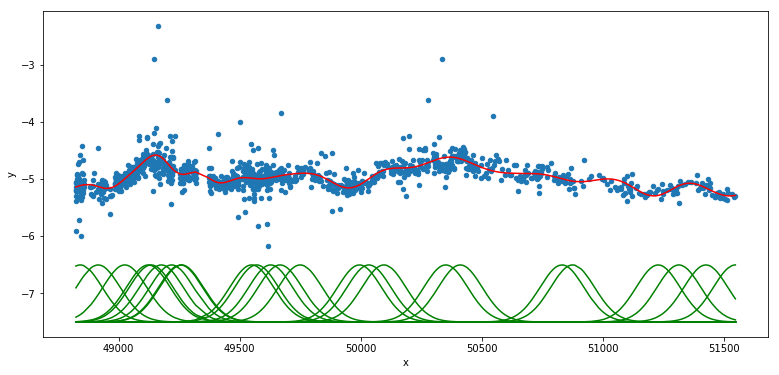

In [289]:
df.plot(kind='scatter', x='x', y='y', figsize=[13, 6])
s = [np.dot(x, w) for x in phi]
plt.plot(df['x'], s, color='red')
for m in mu:
    plt.plot(df['x'], [x - 7.5 for x in k(df['x'], m)], color='green')
plt.show()

# Regresion ridge (Regularización)

In [328]:
alpha = df['x'].std()/20  # ¿Cómo determinar un alpha?
SIZE = 36
mu = np.random.choice(df['x'], size=SIZE - 1)
columns = [[k(x, mu_i) for x in df['x']] for mu_i in mu]
phi = np.column_stack([np.ones(len(df['x']))] + columns)

In [335]:
LAMBDA = 1
a = np.dot(phi.T, phi) + LAMBDA*(np.identity(SIZE))
b = np.linalg.inv(a)
c = np.dot(b, phi.T)
w = np.dot(c, df['y'])

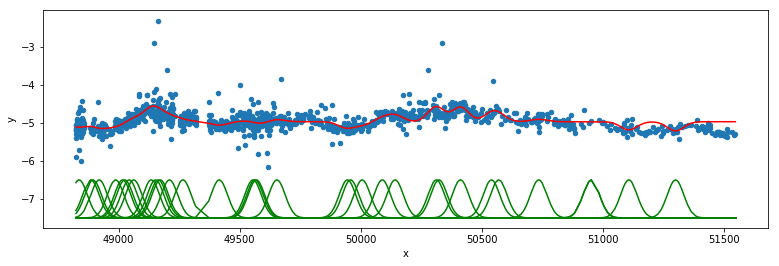

In [336]:
df.plot(kind='scatter', x='x', y='y', figsize=[13, 4])
s = [np.dot(x, w) for x in phi]
plt.plot(df['x'], s, color='red')
for m in mu:
    plt.plot(df['x'], [x - 7.5 for x in k(df['x'], m)], color='green')
plt.show()